In [1]:
import numpy as np
from sklearn import datasets

In [10]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()# .copy()注意！！！！

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [11]:
len(y[y==0])

1617

In [6]:
X.shape

(1797, 64)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9755555555555555

In [15]:
y_log_predict = log_reg.predict(X_test)

In [18]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict),'the size of y_true must be equal to y_predict'
    return np.sum((y_true==0) & (y_predict==0))

TN(y_test, y_log_predict)

403

In [19]:
def FP(y_true, y_predict):
    assert len(y_true) == len(y_predict),'the size of y_true must be equal to y_predict'
    return np.sum((y_true==0) & (y_predict==1))

FP(y_test, y_log_predict)

2

In [20]:
def FN(y_true, y_predict):
    assert len(y_true) == len(y_predict),'the size of y_true must be equal to y_predict'
    return np.sum((y_true==1) & (y_predict==0))

FN(y_test, y_log_predict)

9

In [21]:
def TP(y_true, y_predict):
    assert len(y_true) == len(y_predict),'the size of y_true must be equal to y_predict'
    return np.sum((y_true==1) & (y_predict==1))

TP(y_test, y_log_predict)

36

In [24]:
def confusion_matrix(y_true, y_predict):
    return np.array([
            [TN(y_true, y_predict), FP(y_true, y_predict)],
            [FN(y_true, y_predict), TP(y_true, y_predict)]
        ])

In [25]:
confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]])

In [26]:
def precision_score(y_true, y_predict):
    try:
        return TP(y_true, y_predict) / (TP(y_true, y_predict) + FP(y_true, y_predict))
    else:
        return 0.0
    
def recall_score(y_true, y_predict):
    return TP(y_true, y_predict) / (TP(y_true, y_predict) + FN(y_true, y_predict))

In [27]:
precision_score(y_test, y_log_predict)

0.9473684210526315

In [28]:
recall_score(y_test, y_log_predict)

0.8

## sklearn中的混淆矩阵，精准率，召回率

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [30]:
from sklearn.metrics import precision_score

precision_score(y_test, y_log_predict)

0.9473684210526315

In [31]:
from sklearn.metrics import recall_score

recall_score(y_test, y_log_predict)

0.8

In [32]:
def f1_score(precision, recall):
    try:
        return 2 * precision * recall / (precision + recall)
    except:
        return 0.0

In [33]:
f1_score(0.5, 0.5)

0.5

In [34]:
f1_score(0.1, 0.9)

0.18000000000000002

In [35]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9622222222222222

In [38]:
y_predict = log_reg.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[397,  11],
       [  6,  36]], dtype=int64)

In [40]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)

0.7659574468085106

In [41]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predict)

0.8571428571428571

In [42]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.8089887640449439

## Precision Recall 的平衡

In [82]:
#log_reg.decision_function(X_test)

In [44]:
log_reg.decision_function(X_test)[:10]

array([-44.08549206, -30.98272563, -21.85282511, -22.55322189,
        -6.57982783,  -9.37785623, -24.73943812,   4.10139861,
       -49.38005778, -15.30842416])

In [45]:
log_reg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [46]:
decision_scores = log_reg.decision_function(X_test)

In [47]:
np.min(decision_scores), np.max(decision_scores)

(-52.538873260600624, 17.438281860058567)

In [48]:
y_predict2 = np.array(decision_scores >= 5, dtype='int')

In [49]:
y_predict2[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
confusion_matrix(y_test, y_predict2)

array([[408,   0],
       [ 19,  23]], dtype=int64)

In [51]:
precision_score(y_test, y_predict2)

1.0

In [53]:
y_predict3 = np.array(decision_scores >= -5, dtype='int')

In [54]:
precision_score(y_test, y_predict3), recall_score(y_test, y_predict3)

(0.6086956521739131, 1.0)

## P-R曲线

In [55]:
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

In [66]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precisions = []
recalls = []
#thresholds = list(thresholds)

for threshold in thresholds:
    decision_scores = log_reg.decision_function(X_test)
    y_predict4 = np.array(decision_scores >= threshold, dtype='int')
    pre = precision_score(y_test, y_predict4)
    recall = recall_score(y_test, y_predict4)
    precisions.append(pre)
    recalls.append(recall)

In [67]:
len(precisions)

700

In [68]:
len(recalls)

700

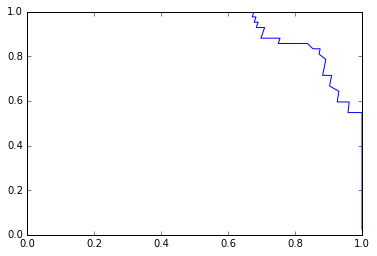

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(precisions,recalls)

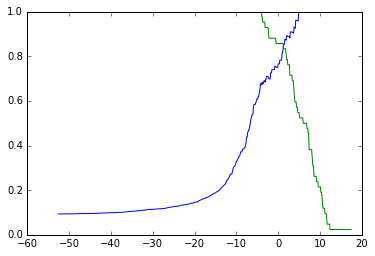

In [72]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)

### sklearn中的P-R曲线

In [74]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [75]:
precisions.shape

(63,)

In [76]:
recalls.shape

(63,)

In [77]:
thresholds.shape

(62,)

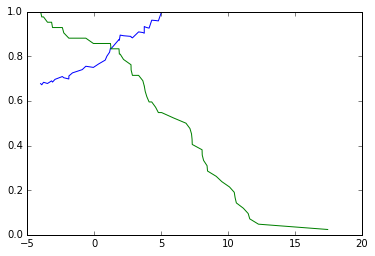

In [78]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])

## ROC曲线

描述TPR FPR

In [79]:
def TPR(y_test, y_predict):
    tp = TP(y_test, y_predict)
    fn = FN(y_test, y_predict)
    try:
        return tp / (tp + fn)
    except:
        return 0.0
    
def FPR(y_test, y_predict):
    fp = FP(y_test, y_predict)
    tn = TN(y_test, y_predict)
    try:
        return fp / (fp + tn)
    except:
        return 0.0

In [81]:
TPR(y_test, y_predict2)

0.5476190476190477

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [84]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

In [85]:
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

In [88]:
tprs = []
fprs = []

for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    tprs.append(TPR(y_test, y_predict))
    fprs.append(FPR(y_test, y_predict))

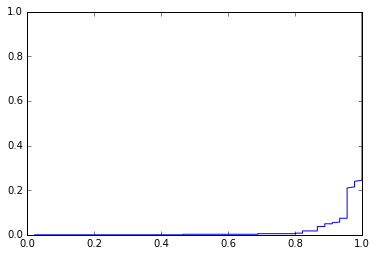

In [89]:
plt.plot(tprs, fprs)

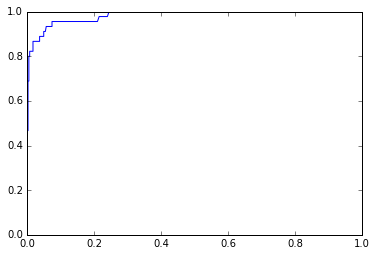

In [90]:
plt.plot(fprs, tprs)

## sklearn中的ROC

In [91]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

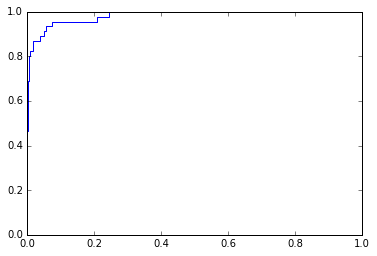

In [92]:
plt.plot(fprs, tprs)

In [93]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)

0.9830452674897119

**roc,auc主要用途：选择模型的指标**